Agent 0 initialized
Agent 1 initialized
Agent 2 initialized
Agent 3 initialized
Agent 4 initialized
Agent 5 initialized
Agent 6 initialized
Agent 7 initialized
Agent 8 initialized
Agent 9 initialized
Agent 0 start running
Agent 1 start running
Agent 2 start running
Agent 3 start running
Agent 4 start running
Agent 5 start running
Agent 6 start running
Agent 7 start running
Agent 8 start running
Agent 9 start running


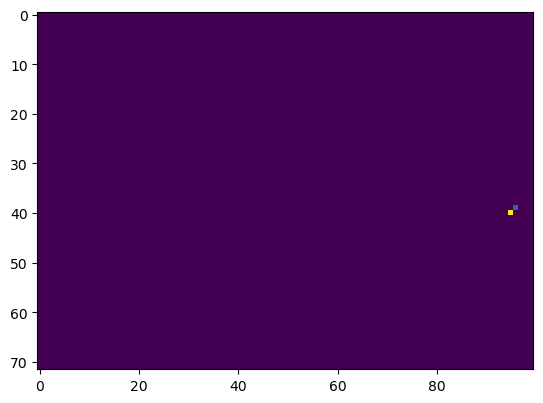

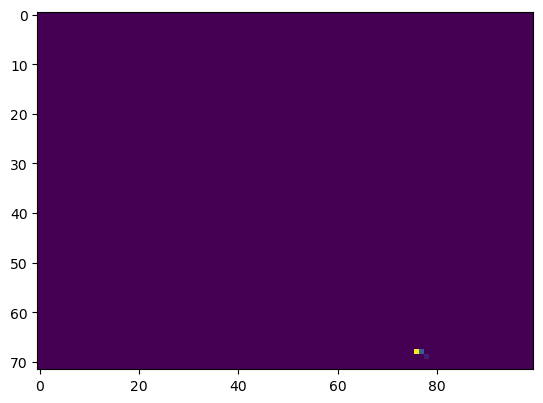

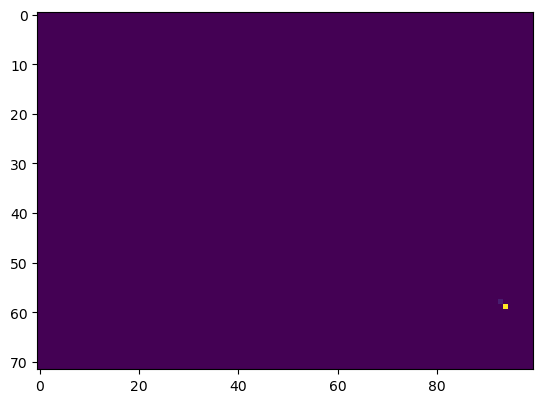

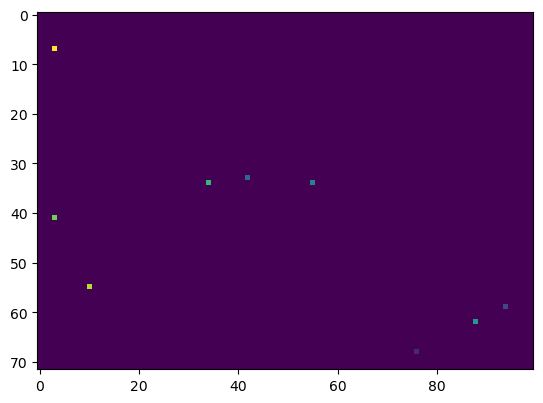

In [1]:
import numpy as np

from src.Lab import Lab

# Settings
height = 72
width = 100
init_pop_count = 10

# Init lab
lab = Lab(height=height, width=width, init_population_count=init_pop_count)
assert np.sum(lab.space.array != None) == init_pop_count  # TODO move to tests
lab.experiment(duration=1)
lab.analyze(n_viz=3)